In [1]:
import torch as t 
import torchvision as tv
DEVICE = 'cpu'

In [2]:
def preprocess(img):
    img[img<20]=200
    return img

In [3]:
def equ_pure(img):
    output = t.zeros_like(img)
    img*=255
    count = t.tensor([t.sum(img==i)for i in range(256)]).float()
    count = count / t.sum(count)
#     F = t.tensor([t.sum(count[:i]) for i in range(256)])
    return count

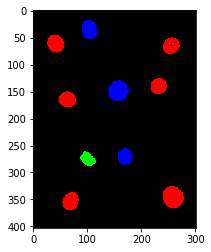

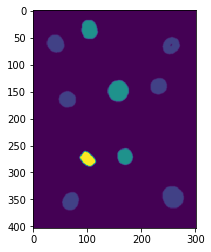

(403, 302, 3)
None
-------------我是条分割线-----------------


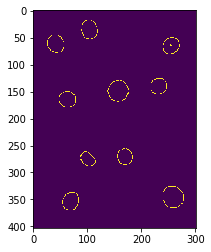

TypeError: 'NoneType' object is not subscriptable

In [8]:
import  cv2
import matplotlib.pyplot as plt
kernel_size = (5,5)
sigma = 1
th1 = 100
th2 = 40
#载入并显示图片
img=cv2.imread('test.png')
plt.imshow(img)
plt.show()
#灰度化
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# gray = preprocess(gray)
#Gaussian Blur
gray = cv2.GaussianBlur(gray, kernel_size, sigma)
plt.imshow(gray)
plt.show()

#输出图像大小，方便根据图像大小调节minRadius和maxRadius
print(img.shape)
#霍夫变换圆检测
circles= cv2.HoughCircles(gray,cv2.HOUGH_GRADIENT,1,300, param1=th1,param2=th2,minRadius=80,maxRadius=180)
edge = cv2.Canny(gray, th1, th1)
plt.imshow(edge)
plt.show()
#输出返回值，方便查看类型
print(circles)
#输出检测到圆的个数
print('-------------我是条分割线-----------------')
#根据检测到圆的信息，画出每一个圆
for circle in circles[0]:
    #圆的基本信息
#     print(circle[2])
    #坐标行列
    x=int(circle[0])
    y=int(circle[1])
    #半径
    r=int(circle[2])
    count=0
    # r = r
    # for i in range(x-r, x+r):
    #     for j in range(y-r,y+r):
    #         try:
    #             if t.dist(t.tensor([x,y], dtype=t.float), t.tensor([i,j], dtype=t.float))<=r:
    #                 if edge[i,j]!=0:
    #                     count+=1
    #         except:
    #             continue
    # print("R={}, edge count={},".format(circle[2],count))
#     print(count)
    #在原图用指定颜色标记出圆的位置
    img=cv2.circle(img,(x,y),r,(0,255,0),-1)
    # if count<200:
    #     img=cv2.circle(img,(x,y),r,(0,0,255),-1)
    # else:
    #     img=cv2.circle(img,(x,y),r,(0,255,0),-1)
    
    #显示新图像
    plt.imshow(img)
    plt.show()

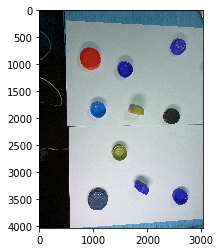

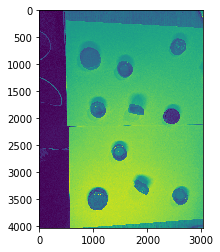

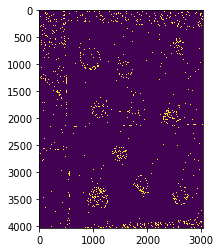

In [25]:
th1 = 50
th2 = 40
img=cv2.imread('image/img2.jpg')
plt.imshow(img)
plt.show()
#灰度化
gray=cv2.cvtColor(img,cv2.COLOR_BGR2HLS)[...,1]
plt.imshow(gray)
plt.show()
edge = cv2.Canny(gray, th1, th1)
plt.imshow(edge)
plt.show()

In [12]:
gray.shape

(4032, 3024, 3)

In [59]:
t.dist(t.tensor([1.0,0]), t.tensor([1.0,1]))

tensor(1.)

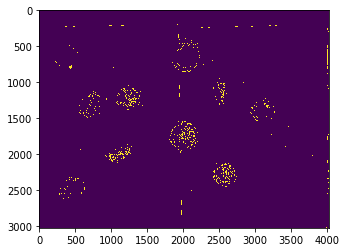

In [74]:
plt.imshow(edge)

In [44]:
plt.imshow?

Signature:
plt.imshow(
    X,
    cmap=None,
    norm=None,
    aspect=None,
    interpolation=None,
    alpha=None,
    vmin=None,
    vmax=None,
    origin=None,
    extent=None,
    shape=<deprecated parameter>,
    filternorm=1,
    filterrad=4.0,
    imlim=<deprecated parameter>,
    resample=None,
    url=None,
    *,
    data=None,
    **kwargs,
)
Docstring:
Display an image, i.e. data on a 2D regular raster.

Parameters
----------
X : array-like or PIL image
    The image data. Supported array shapes are:

    - (M, N): an image with scalar data. The data is visualized
      using a colormap.
    - (M, N, 3): an image with RGB values (0-1 float or 0-255 int).
    - (M, N, 4): an image with RGBA values (0-1 float or 0-255 int),
      i.e. including transparency.

    The first two dimensions (M, N) define the rows and columns of
    the image.

    Out-of-range RGB(A) values are clipped.

cmap : str or `~matplotlib.colors.Colormap`, optional
    The Colormap instance or register